In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.linear_model import Lasso
from scipy.io import loadmat
from sklearn.metrics import mean_squared_error
from scipy.integrate import solve_ivp

import pysindy as ps

import os

import math  
import sys  
sys.path.append('C:/Users/j/hotai/myfolder')

from my_function import miscore, siscore
# Ignore matplotlib deprecation warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Seed the random number generators for reproducibility
np.random.seed(100)

integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

addp=5
startp=90
endp=120
dp=endp-startp
p_tot=addp*(dp-1)+1
file_tot=100
n=25
xstart=0
xend=25

In [2]:
def read_data(file_path,file_name,n,file_start=0,file_end=0,xstart=0,xend=0):
    x=np.zeros((121,n,n))
    y=np.zeros((121,n,n))
    vx=np.zeros((121,n,n))
    vy=np.zeros((121,n,n))
    for i in range(file_start,file_end):
        xp=[]
        yp=[]
        vxp=[]
        vyp=[]
        isvalid=[]
        xtmp=[]
        ytmp=[]
        vxtmp=[]
        vytmp=[]
        isvalidtmp=[]
        
        for root,dirs,files in os.walk(file_path):
            #print(root)
            
            for dir in dirs:
                #print(os.path.join(root,file))
                
    
                    with open(os.path.join(root,dir,file_name[i]), 'r') as f:  
                        lines = f.readlines()
                        for line in lines[3:]: 
                            num=line.split()
                            xtmp.append(float(num[0]))
                            ytmp.append(float(num[1]))
                            vxtmp.append(float(num[2]))
                            vytmp.append(float(num[3]))
                            isvalidtmp.append(float(num[4]))
        
                    xp.append(np.array(xtmp).reshape(25,25))
                    yp.append(np.array(ytmp).reshape(25,25))
                    vxp.append(np.array(vxtmp).reshape(25,25))
                    vyp.append(np.array(vytmp).reshape(25,25))
                    isvalid.append(np.array(isvalidtmp).reshape(25,25))
                    xtmp=[]
                    ytmp=[]
                    vxtmp=[]
                    vytmp=[]
                    isvalidtmp=[]
        #
        xp=np.array(xp)
        yp=np.array(yp)
        vxp=np.array(vxp)
        vyp=np.array(vyp)
        isvalid=np.array(isvalid)
        x=x+xp/file_tot
        y=y+yp/file_tot
        vx=vx+vxp/file_tot
        vy=vy+vyp/file_tot
    x=x.T
    x=x[xstart:xend,xstart:xend]
    y=y.T
    y=y[xstart:xend,xstart:xend]
    vx=vx.T
    vx=vx[xstart:xend,xstart:xend]
    vy=vy.T
    vy=vy[xstart:xend,xstart:xend]
    isvalid=isvalid.T
    isvalid=isvalid[xstart:xend,xstart:xend]
    return x,y,vx,vy

In [3]:
file_path = os.path.join('D:\\', 'hotaidata','sr_C6_01')
file_name=['B00001.dat','B00002.dat','B00003.dat','B00004.dat','B00005.dat','B00006.dat','B00007.dat','B00008.dat',
           'B00009.dat','B00010.dat','B00011.dat','B00012.dat','B00013.dat','B00014.dat','B00015.dat','B00016.dat','B00017.dat',
           'B00018.dat','B00019.dat','B00020.dat','B00021.dat','B00022.dat','B00023.dat','B00024.dat','B00025.dat','B00026.dat',
           'B00027.dat','B00028.dat','B00029.dat','B00030.dat','B00031.dat','B00032.dat','B00033.dat','B00034.dat','B00035.dat',
           'B00036.dat','B00037.dat','B00038.dat','B00039.dat','B00040.dat','B00041.dat','B00042.dat','B00043.dat','B00044.dat',
           'B00045.dat','B00046.dat','B00047.dat','B00048.dat','B00049.dat','B00050.dat','B00051.dat','B00052.dat','B00053.dat',
           'B00054.dat','B00055.dat','B00056.dat','B00057.dat','B00058.dat','B00059.dat','B00060.dat','B00061.dat','B00062.dat',
           'B00063.dat','B00064.dat','B00065.dat','B00066.dat','B00067.dat','B00068.dat','B00069.dat','B00070.dat','B00071.dat',
           'B00072.dat','B00073.dat','B00074.dat','B00075.dat','B00076.dat','B00077.dat','B00078.dat','B00079.dat','B00080.dat',
           'B00081.dat','B00082.dat','B00083.dat','B00084.dat','B00085.dat','B00086.dat','B00087.dat','B00088.dat','B00089.dat',
           'B00090.dat','B00091.dat','B00092.dat','B00093.dat','B00094.dat','B00095.dat','B00096.dat','B00097.dat','B00098.dat',
           'B00099.dat','B00100.dat']
x=np.zeros((121,n,n))
y=np.zeros((121,n,n))
vx=np.zeros((121,n,n))
vy=np.zeros((121,n,n))

x,y,vx,vy=read_data(file_path,file_name,25,0,100,xstart,xend)
#print(x[0,:,:])
t=np.linspace(0,60/800,121)
dt=t[1]-t[0]

t=t[startp:endp]
print(len(t))
t_train=np.linspace(t[0],t[-1],addp*(len(t)-1)+1)
dt_train=t_train[1]-t_train[0]
print(len(t_train.shape))

30
1


In [4]:
#u is not pre adding, v add a median
spatial_grid = np.asarray([x[:,:,0].T,y[:,:,0].T]).T

n=xend-xstart

u=np.zeros((n,n,121, 2))

u[:, :, :, 0] = vx
u[:, :, :, 1] = vy

u_train=np.zeros((n,n,len(t), 2))
u_train=u[:,:,startp:endp,:]

v_train=np.zeros((n,n,len(t_train),2))

for i in range(len(t)-1):
    for j in range(addp):
        v_train[:,:,addp*i+j]=(u_train[:,:,i]*(addp-j)+u_train[:,:,i+1]*j)/addp
v_train[:,:,-1]=u_train[:,:,-1]


<function matplotlib.pyplot.show(close=None, block=None)>

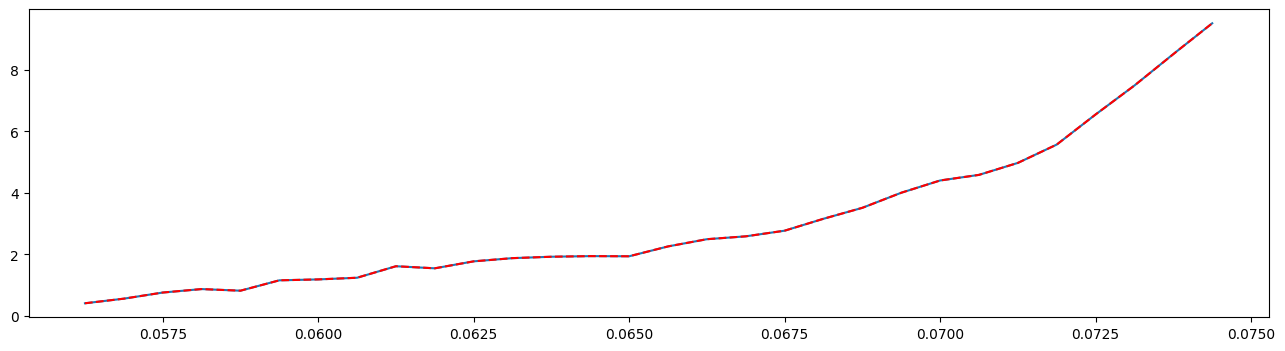

In [5]:
op=np.zeros(len(t))
op=u_train[10,10,:,0]
op_train=np.zeros(len(t_train))
for i in range(len(t)-1):
    for j in range(addp):
        op_train[i*addp+j]=(op[i]*(addp-j)+op[i+1]*j)/addp
op_train[-1]=op[-1]
plt.figure(figsize=(16, 4))
plt.plot(t,op)
plt.plot(t_train,op_train,'r--')
plt.show

In [6]:
v_train_dot = ps.FiniteDifference(axis=2)._differentiate(v_train, dt_train)

vtmp=np.zeros(v_train_dot.shape)
vtmp[:,:,0]=v_train[:,:,0]
for i in range(len(t_train)-1):
    vtmp[:,:,i+1]=vtmp[:,:,i]+v_train_dot[:,:,i]*dt_train
miscore(vtmp,v_train)
siscore(vtmp,v_train)
vtmp=v_train+v_train_dot*dt_train

vtmp[:,:,1:]=vtmp[:,:,:len(t_train)-1]
miscore(vtmp,v_train)
siscore(vtmp,v_train)


MI(average/percent):
0.9964637380273957 0.9999779054352629
SI(average/percent):
0.9998878391404054 0.9999558108705259
MI(average/percent):
0.9994534088703417 1.0
SI(average/percent):
0.9999869371824788 1.0


(0.9999869371824788, 1.0)

In [7]:
# Define PDE library that is quadratic in u, and
# fourth-order in spatial derivatives of u.    periodic=True

library_functions = [
    lambda y: y,
    lambda x: x*x,
    
    lambda x, y: x * y,
    lambda x, y: x * x * y,
]
library_function_names = [
    lambda y: y,
    lambda x: x+x,
    
    lambda x, y: x + y,
    lambda x, y: x + x + y,
]
pde_lib = ps.PDELibrary(
    library_functions=library_functions,
    function_names=library_function_names,
    derivative_order=1,
    spatial_grid=spatial_grid,
    include_bias=True,
    is_uniform=True
    
)




print('SINDy')
model = ps.SINDy(feature_names=['Vx','Vy'])

model.fit(v_train, x_dot=v_train_dot)
model.print()
#u_dot_stlsq = model.predict(v_train)x_dot=v_train_dot
'''
print('STLSQ model: ')
optimizer = ps.STLSQ(threshold=50, alpha=1e-5, 
                     normalize_columns=True, max_iter=200)
model = ps.SINDy(feature_library=pde_lib, optimizer=optimizer,feature_names=['Vx','Vy'])
model.fit(v_train, dt_train)
model.print()'''

SINDy
(Vx)' = 68.778 1 + 20.374 Vx + -46.266 Vy + 5.373 Vx^2 + 0.572 Vx Vy + 3.676 Vy^2
(Vy)' = -146.303 1 + 28.550 Vx + -6.222 Vy + -0.111 Vx^2 + -3.795 Vx Vy + -1.440 Vy^2


"\nprint('STLSQ model: ')\noptimizer = ps.STLSQ(threshold=50, alpha=1e-5, \n                     normalize_columns=True, max_iter=200)\nmodel = ps.SINDy(feature_library=pde_lib, optimizer=optimizer,feature_names=['Vx','Vy'])\nmodel.fit(v_train, dt_train)\nmodel.print()"

In [8]:
print("Model score: %f" % model.score(u_train, t=t))
print("Model score: %f" % model.score(u_train, t=dt))
print("Model score: %f" % model.score(v_train, t=t_train))
print("Model score: %f" % model.score(v_train, t=dt_train))

Model score: 0.198834
Model score: 0.198834
Model score: 0.162804
Model score: 0.162804


In [9]:
x_test,y_test,vx_test,vy_test=read_data(file_path,file_name,25,0,100,xstart,xend)


t_test=np.linspace(t[0],t[-1],addp*(len(t)-1)+1)
dt_test=t_test[1]-t_test[0]

si_t=np.zeros(p_tot)
mi_t=np.zeros(p_tot)
si_t_per=np.zeros(p_tot)
mi_t_per=np.zeros(p_tot)

In [10]:
#u is not pre adding, v add a median


n=xend-xstart


u[:, :, :, 0] = vx_test
u[:, :, :, 1] = vy_test

u_test=np.zeros((n,n,len(t), 2))
u_test=u[:,:,startp:endp,:]

v_test=np.zeros((n,n,len(t_test),2))
for i in range(len(t)-1):
    for j in range(addp):
        v_test[:,:,addp*i+j]=(u_test[:,:,i]*(addp-j)+u_test[:,:,i+1]*j)/addp
v_test[:,:,-1]=u_test[:,:,-1]


In [11]:
x_dot_test_predicted = model.predict(v_test)
x_dot_test_predicted=x_dot_test_predicted.reshape(n,n,p_tot,2)
tlen=len(t_train)
dot_tmp=np.array(x_dot_test_predicted)
pltpredict=np.zeros((n,n,tlen,2))
#print(dot_tmp[10,10])

In [12]:
print('add 7 point, from 80 to 120, with library x^3, derivative order 2, MI:0.6748241001379309, SI:0.8570345301079201')
print('add 7 point, from 80 to 120, with library x^3, derivative order 1, MI:0.6732771082529756, SI:0.8589308511150588')
print('add 7 point, from 80 to 120, with library x^2, derivative order 2, MI:0.6707939885275049, SI:0.8459658232811543')
print('add 7 point, from 80 to 120, with library x^2, derivative order 1, MI:0.6693806511354194, SI:0.8426666431380524')
print('add 7 point, from 90 to 120, with library x^2, derivative order 1, MI:0.6709005447980256, SI:0.8424080789942714')

pltpredict[:,:,0]=v_train[:,:,0]
for i in range(tlen-1):
    pltpredict[:,:,i+1]=pltpredict[:,:,i]+dot_tmp[:,:,i]*dt_train
miscore(pltpredict,v_test)
siscore(pltpredict,v_test)
#print(pltpredict[10,10])
#print(v_train[10,10])

add 7 point, from 80 to 120, with library x^3, derivative order 2, MI:0.6748241001379309, SI:0.8570345301079201
add 7 point, from 80 to 120, with library x^3, derivative order 1, MI:0.6732771082529756, SI:0.8589308511150588
add 7 point, from 80 to 120, with library x^2, derivative order 2, MI:0.6707939885275049, SI:0.8459658232811543
add 7 point, from 80 to 120, with library x^2, derivative order 1, MI:0.6693806511354194, SI:0.8426666431380524
add 7 point, from 90 to 120, with library x^2, derivative order 1, MI:0.6709005447980256, SI:0.8424080789942714
MI(average/percent):
0.8667501146830874 0.8117322138753866
SI(average/percent):
0.8782828275204486 0.8054573574900574


(0.8782828275204486, 0.8054573574900574)

0


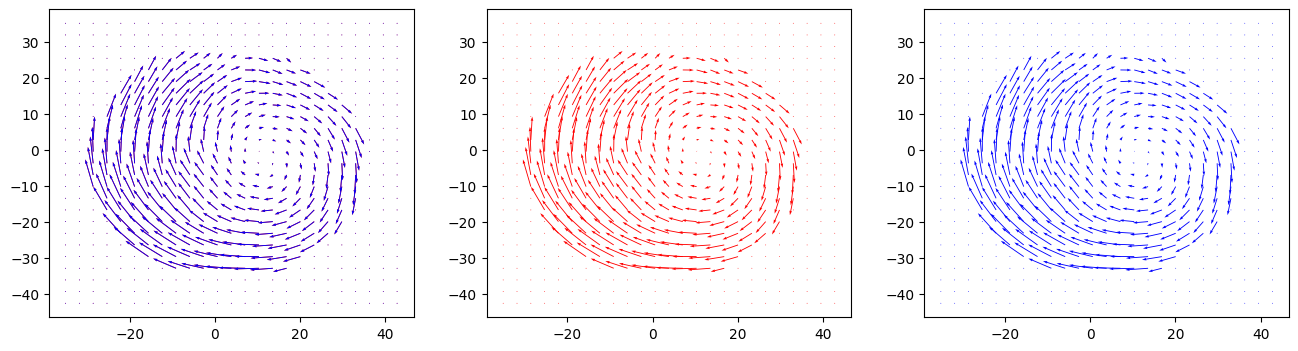

MI(average/percent):
1.0 1.0
SI(average/percent):
0.9999999999999934 1.0
1
MI(average/percent):
0.995836216689166 1.0
SI(average/percent):
0.9999317350238228 1.0
2
MI(average/percent):
0.9916880410619074 1.0
SI(average/percent):
0.9997250341914428 1.0
3
MI(average/percent):
0.9875573035171294 1.0
SI(average/percent):
0.999376706380362 1.0
4
MI(average/percent):
0.9834458347462597 1.0
SI(average/percent):
0.9988833681064743 1.0
5


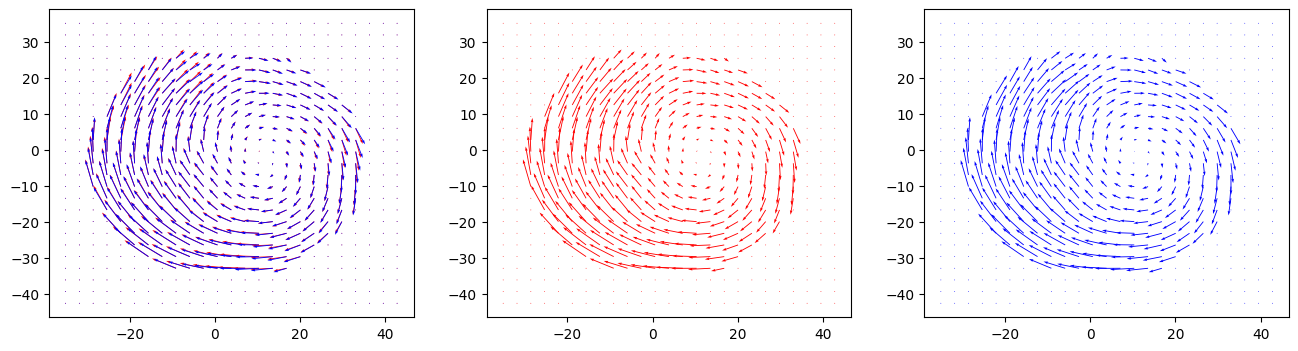

MI(average/percent):
0.9793556503149036 0.9967741935483871
SI(average/percent):
0.9982417678373438 1.0
6
MI(average/percent):
0.9779047937238259 0.9967741935483871
SI(average/percent):
0.9982587023877137 1.0
7
MI(average/percent):
0.9757474632972225 0.9967741935483871
SI(average/percent):
0.9981403781438946 1.0
8
MI(average/percent):
0.9730113237390243 0.9935483870967742
SI(average/percent):
0.997895016841345 1.0
9
MI(average/percent):
0.9698391447537632 0.9935483870967742
SI(average/percent):
0.9975309152319604 1.0
10


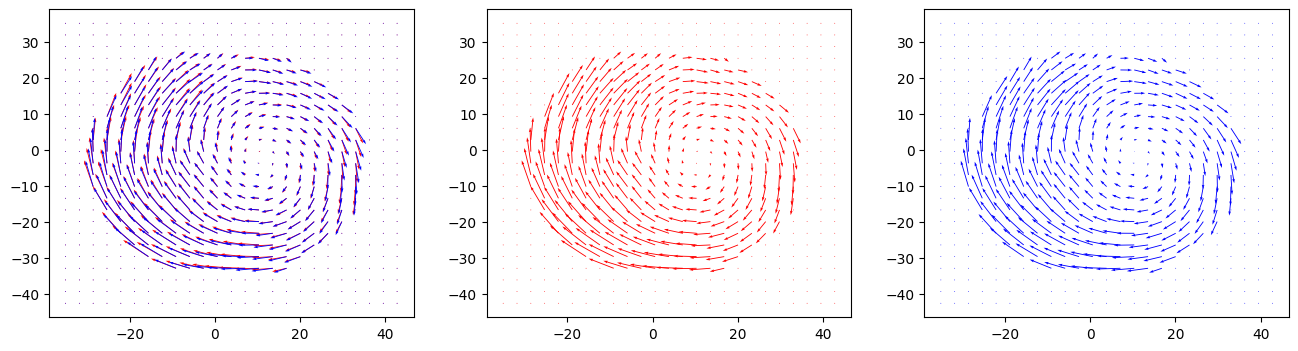

MI(average/percent):
0.9660461677351523 0.9935483870967742
SI(average/percent):
0.9970538047064122 1.0
11
MI(average/percent):
0.9636702441916476 0.9935483870967742
SI(average/percent):
0.9968922314010111 1.0
12
MI(average/percent):
0.9608276506858617 0.9903225806451613
SI(average/percent):
0.9966774570841169 1.0
13
MI(average/percent):
0.9575180426975952 0.9903225806451613
SI(average/percent):
0.9961454311469972 1.0
14
MI(average/percent):
0.9540788492182964 0.9903225806451613
SI(average/percent):
0.9941781958719301 0.9967741935483871
15


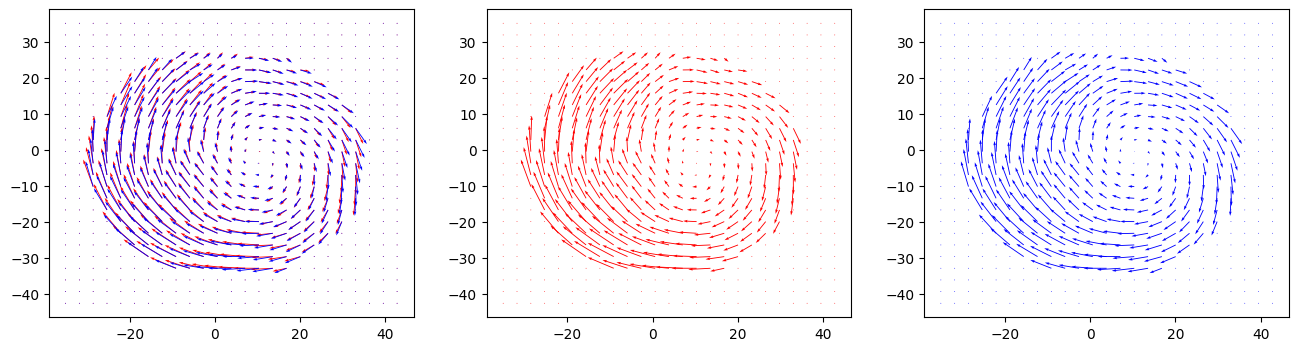

MI(average/percent):
0.9503637749363659 0.9870967741935484
SI(average/percent):
0.9918432467437776 0.9967741935483871
16
MI(average/percent):
0.9486014886950119 0.9903225806451613
SI(average/percent):
0.9927944812781989 0.9967741935483871
17
MI(average/percent):
0.9466569809493617 0.9903225806451613
SI(average/percent):
0.9938674219546716 0.9967741935483871
18
MI(average/percent):
0.9447001696305469 0.9903225806451613
SI(average/percent):
0.9946392204885715 1.0
19
MI(average/percent):
0.942746478569892 0.9903225806451613
SI(average/percent):
0.9946001733459067 1.0
20


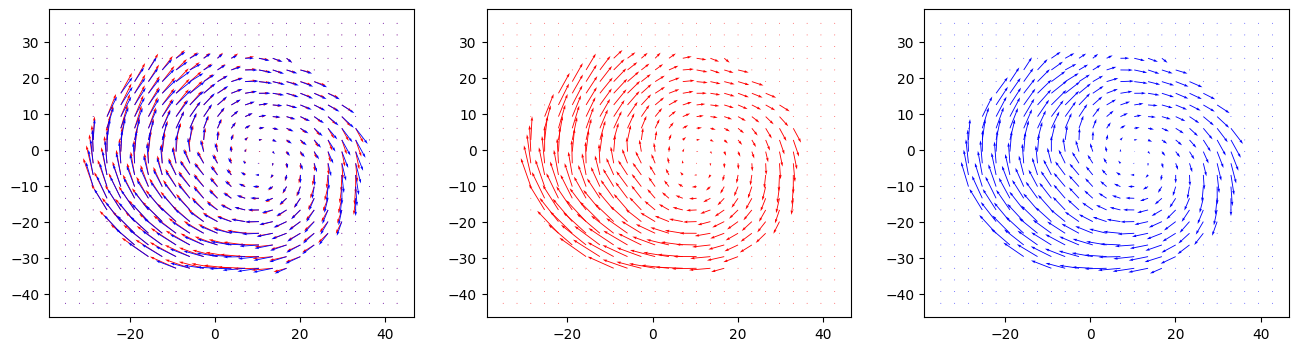

MI(average/percent):
0.9407068091692784 0.9903225806451613
SI(average/percent):
0.9940198233741301 1.0
21
MI(average/percent):
0.9391497246833956 0.9903225806451613
SI(average/percent):
0.9938952925287876 1.0
22
MI(average/percent):
0.937668868185108 0.9903225806451613
SI(average/percent):
0.9929545439922441 1.0
23
MI(average/percent):
0.9361381854920141 0.9903225806451613
SI(average/percent):
0.9917217850192669 0.9967741935483871
24
MI(average/percent):
0.9345318953487382 0.9870967741935484
SI(average/percent):
0.9905315769269185 0.9967741935483871
25


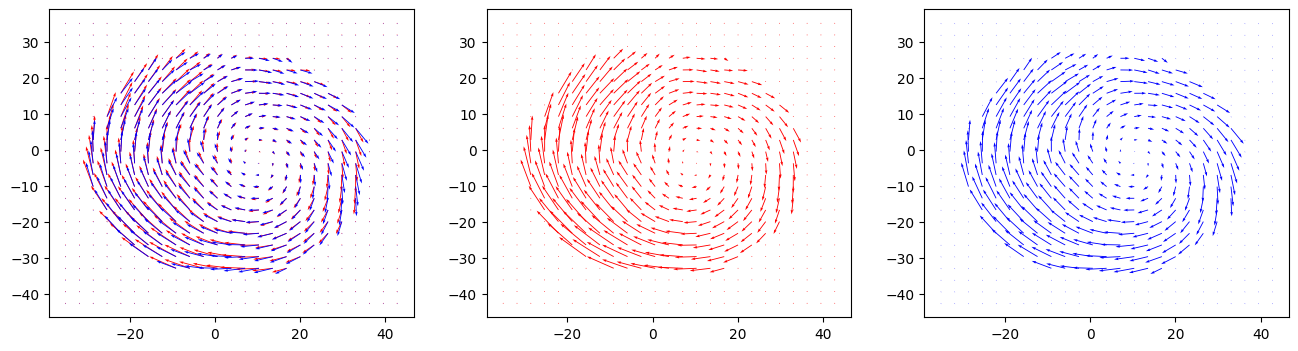

MI(average/percent):
0.9326467733428545 0.9838709677419355
SI(average/percent):
0.989370413247995 0.9935483870967742
26
MI(average/percent):
0.9319891126104747 0.9870967741935484
SI(average/percent):
0.9891814587962967 0.9935483870967742
27
MI(average/percent):
0.9311898018928177 0.9870967741935484
SI(average/percent):
0.9888833391437237 0.9935483870967742
28
MI(average/percent):
0.9302364445832074 0.9838709677419355
SI(average/percent):
0.9884768184751624 0.9935483870967742
29
MI(average/percent):
0.9290848846976243 0.9870967741935484
SI(average/percent):
0.9879626794566609 0.9935483870967742
30


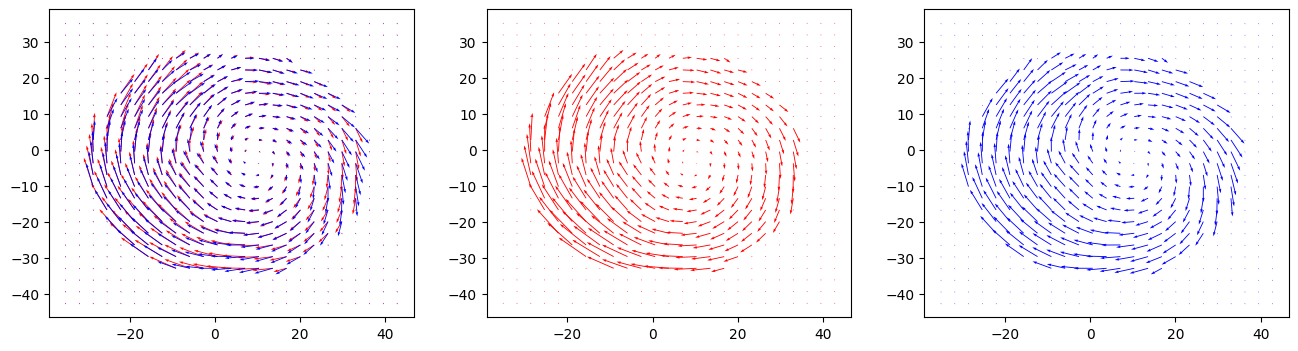

MI(average/percent):
0.9278920233068557 0.9870967741935484
SI(average/percent):
0.9873416398916942 0.9935483870967742
31
MI(average/percent):
0.92765756489561 0.9870967741935484
SI(average/percent):
0.9863797808219565 0.9935483870967742
32
MI(average/percent):
0.9273100487976825 0.9903225806451613
SI(average/percent):
0.9853213741068259 0.9935483870967742
33
MI(average/percent):
0.9267323176457432 0.9903225806451613
SI(average/percent):
0.9841609043451187 0.9935483870967742
34
MI(average/percent):
0.925823669086368 0.9903225806451613
SI(average/percent):
0.9828940544802119 0.9935483870967742
35


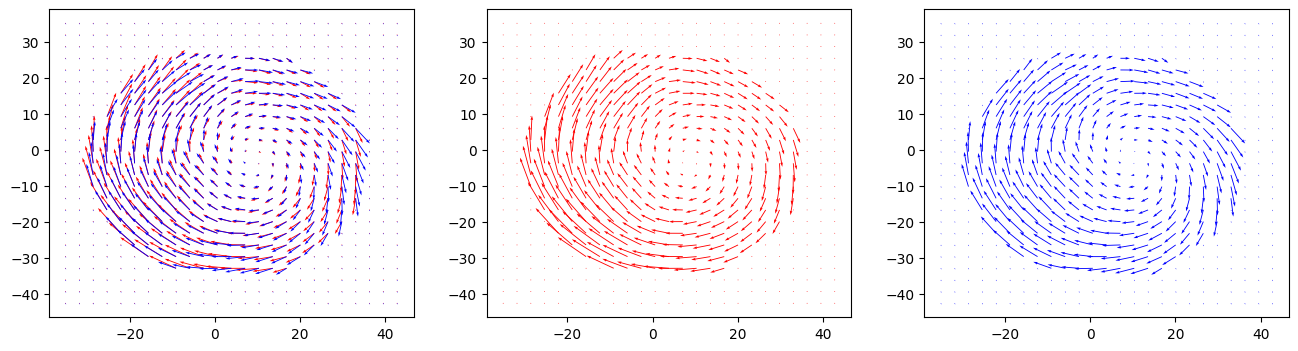

MI(average/percent):
0.9247679317218696 0.9903225806451613
SI(average/percent):
0.9815178044037375 0.9935483870967742
36
MI(average/percent):
0.9224779532712813 0.9870967741935484
SI(average/percent):
0.9797376527321426 0.9903225806451613
37
MI(average/percent):
0.9198963126193688 0.9838709677419355
SI(average/percent):
0.9777137166188893 0.9870967741935484
38
MI(average/percent):
0.9170198491747191 0.9806451612903225
SI(average/percent):
0.9753471796274793 0.9870967741935484
39
MI(average/percent):
0.9139936442207451 0.9806451612903225
SI(average/percent):
0.9723351944824481 0.9870967741935484
40


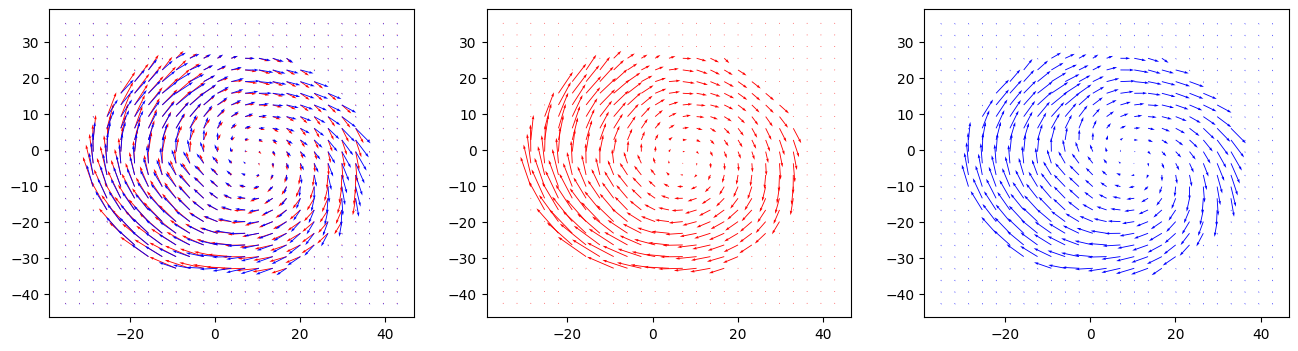

MI(average/percent):
0.9109452593927251 0.9741935483870968
SI(average/percent):
0.9697150463464523 0.9870967741935484
41
MI(average/percent):
0.9084610786803927 0.967741935483871
SI(average/percent):
0.9704834192687076 0.9870967741935484
42
MI(average/percent):
0.9062523782246471 0.9580645161290322
SI(average/percent):
0.9684881974087218 0.9838709677419355
43
MI(average/percent):
0.9036080065267789 0.9451612903225807
SI(average/percent):
0.9668139713107032 0.9741935483870968
44
MI(average/percent):
0.9008364303521137 0.9387096774193548
SI(average/percent):
0.9650155317612398 0.967741935483871
45


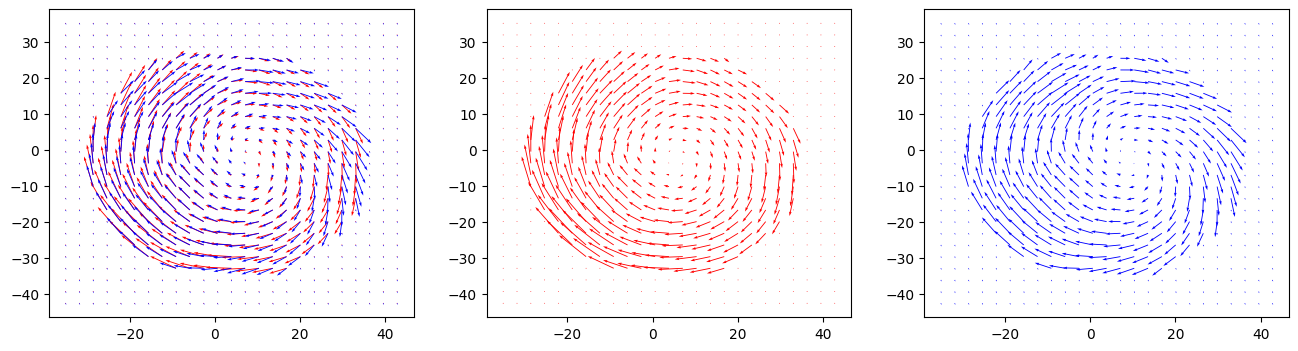

MI(average/percent):
0.897737937750197 0.9290322580645162
SI(average/percent):
0.9629067632916413 0.967741935483871
46
MI(average/percent):
0.895030074375766 0.932258064516129
SI(average/percent):
0.9611722899315351 0.967741935483871
47
MI(average/percent):
0.8921579471295825 0.932258064516129
SI(average/percent):
0.9591753583478 0.964516129032258
48
MI(average/percent):
0.8892868252754209 0.9290322580645162
SI(average/percent):
0.9569644734439368 0.964516129032258
49
MI(average/percent):
0.8864207084879948 0.9193548387096774
SI(average/percent):
0.9550682570367321 0.9580645161290322
50


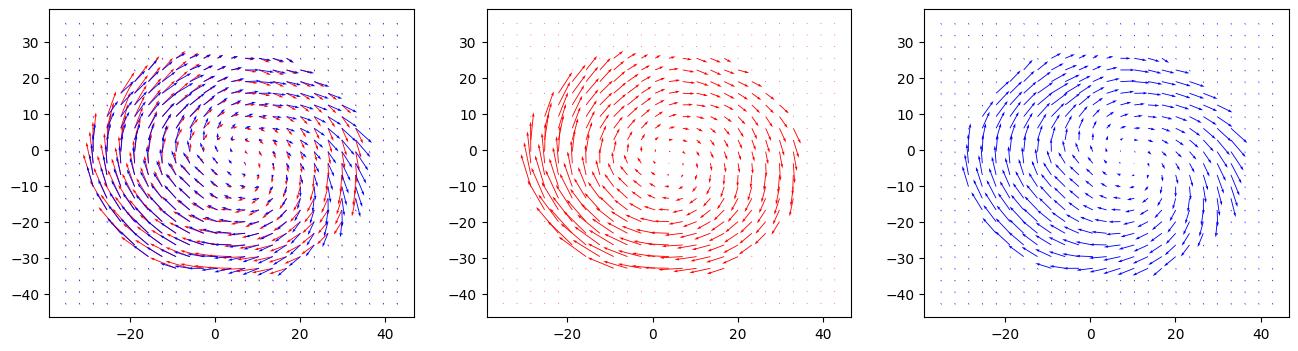

MI(average/percent):
0.8833128185561053 0.9064516129032258
SI(average/percent):
0.9519511005736879 0.9580645161290322
51
MI(average/percent):
0.881800305593455 0.9032258064516129
SI(average/percent):
0.9506230063166219 0.9580645161290322
52
MI(average/percent):
0.880354525280998 0.9
SI(average/percent):
0.9496370307261343 0.9580645161290322
53
MI(average/percent):
0.8789332823785438 0.8870967741935484
SI(average/percent):
0.9478810873442262 0.9580645161290322
54
MI(average/percent):
0.8774302460365432 0.8806451612903226
SI(average/percent):
0.945712326755253 0.9548387096774194
55


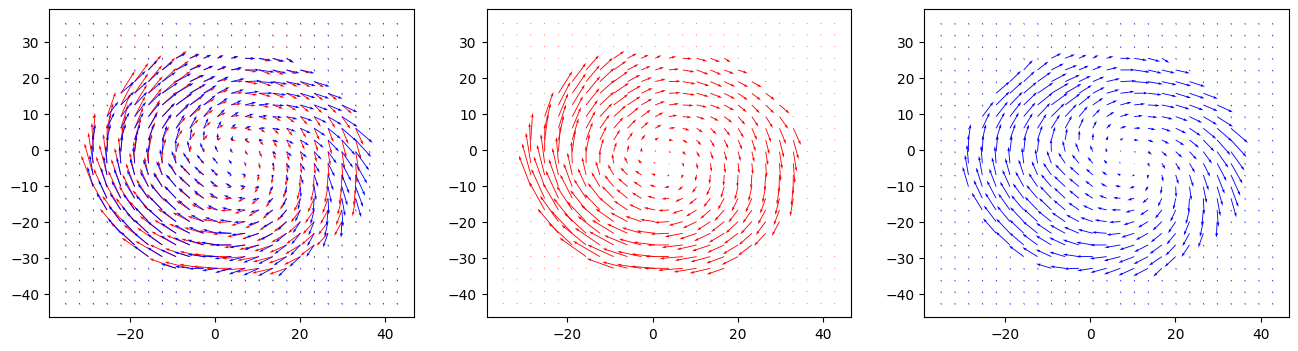

MI(average/percent):
0.8759301180948229 0.8806451612903226
SI(average/percent):
0.9432340846989291 0.9483870967741935
56
MI(average/percent):
0.8744923421011649 0.8709677419354839
SI(average/percent):
0.9394577193036301 0.9451612903225807
57
MI(average/percent):
0.8729097141392076 0.867741935483871
SI(average/percent):
0.9351937169806891 0.9387096774193548
58
MI(average/percent):
0.8713434407148596 0.8709677419354839
SI(average/percent):
0.9305576077891754 0.9354838709677419
59
MI(average/percent):
0.8698527230392962 0.8580645161290322
SI(average/percent):
0.926375464746286 0.932258064516129
60


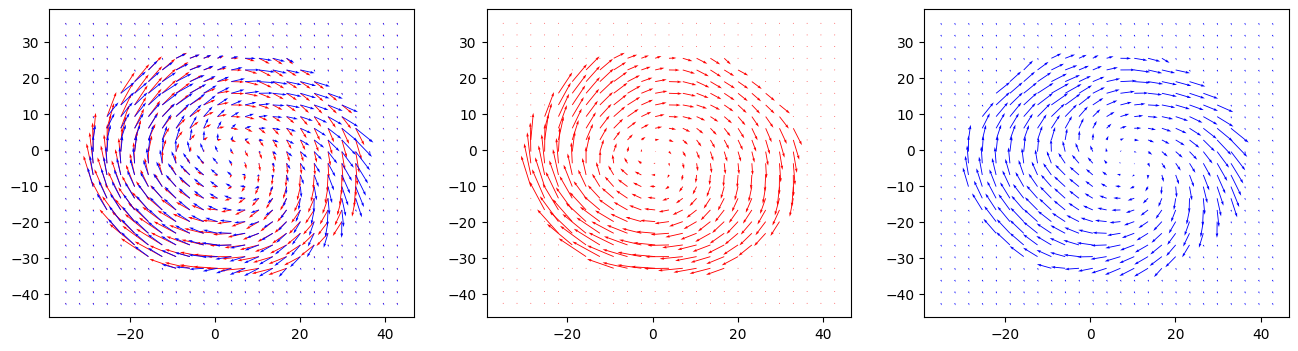

MI(average/percent):
0.8684421209902274 0.8516129032258064
SI(average/percent):
0.9233753872950227 0.9225806451612903
61
MI(average/percent):
0.86711303133386 0.8483870967741935
SI(average/percent):
0.9212490368542519 0.9225806451612903
62
MI(average/percent):
0.8657774961313378 0.8451612903225807
SI(average/percent):
0.9183043438890992 0.9193548387096774
63
MI(average/percent):
0.8643808787084524 0.8483870967741935
SI(average/percent):
0.915271077048499 0.9161290322580645
64
MI(average/percent):
0.8629486399660709 0.8516129032258064
SI(average/percent):
0.91279483029288 0.9096774193548387
65


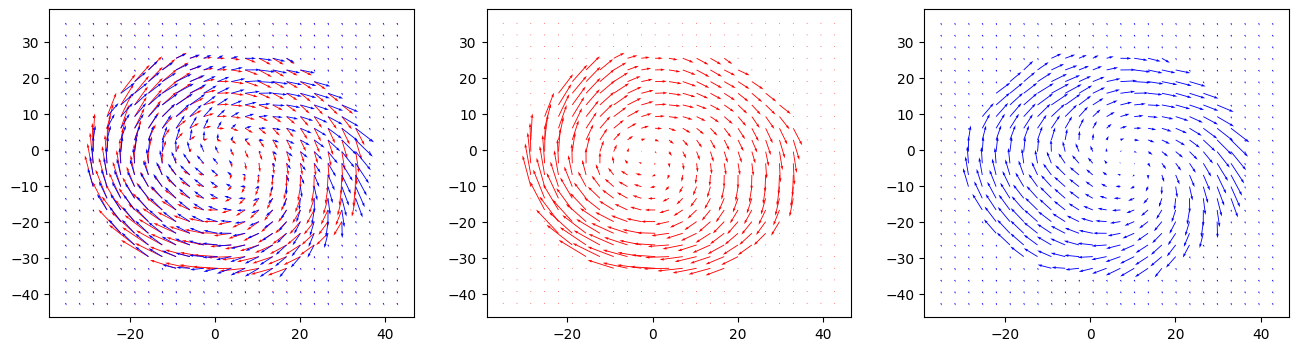

MI(average/percent):
0.8616114731592608 0.8516129032258064
SI(average/percent):
0.9097469676336599 0.9032258064516129
66
MI(average/percent):
0.8595746032878641 0.8419354838709677
SI(average/percent):
0.9051786771754023 0.8935483870967742
67
MI(average/percent):
0.8573952826906107 0.832258064516129
SI(average/percent):
0.9022544082405548 0.8870967741935484
68
MI(average/percent):
0.8554057109828762 0.8161290322580645
SI(average/percent):
0.8993337887121928 0.8903225806451613
69
MI(average/percent):
0.8533440069857032 0.8096774193548387
SI(average/percent):
0.8951600921226879 0.8903225806451613
70


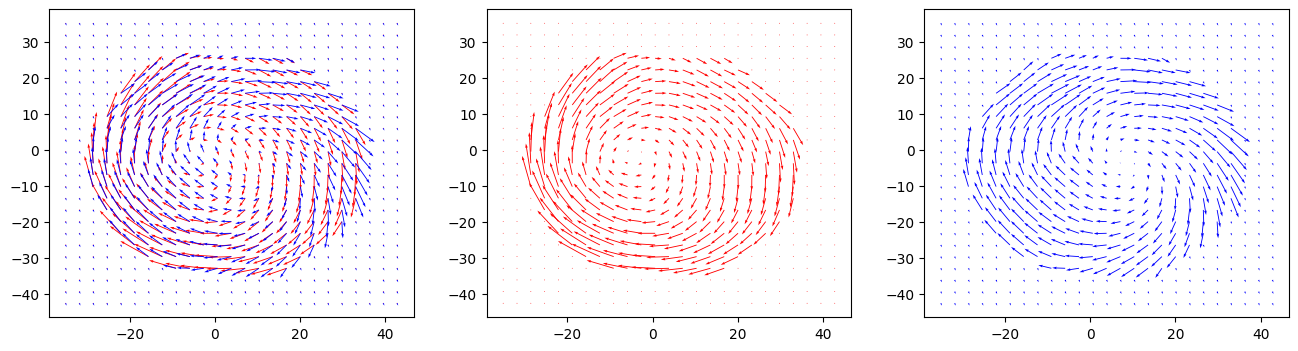

MI(average/percent):
0.8512317970334988 0.7967741935483871
SI(average/percent):
0.8908830561617389 0.8806451612903226
71
MI(average/percent):
0.8508318633915419 0.7870967741935484
SI(average/percent):
0.8867006903706032 0.8612903225806452
72
MI(average/percent):
0.8504228281938045 0.7838709677419354
SI(average/percent):
0.8819430434041832 0.8580645161290322
73
MI(average/percent):
0.8500291706859733 0.7741935483870968
SI(average/percent):
0.877765643093962 0.832258064516129
74
MI(average/percent):
0.849494555026264 0.7774193548387097
SI(average/percent):
0.8745268339700265 0.8225806451612904
75


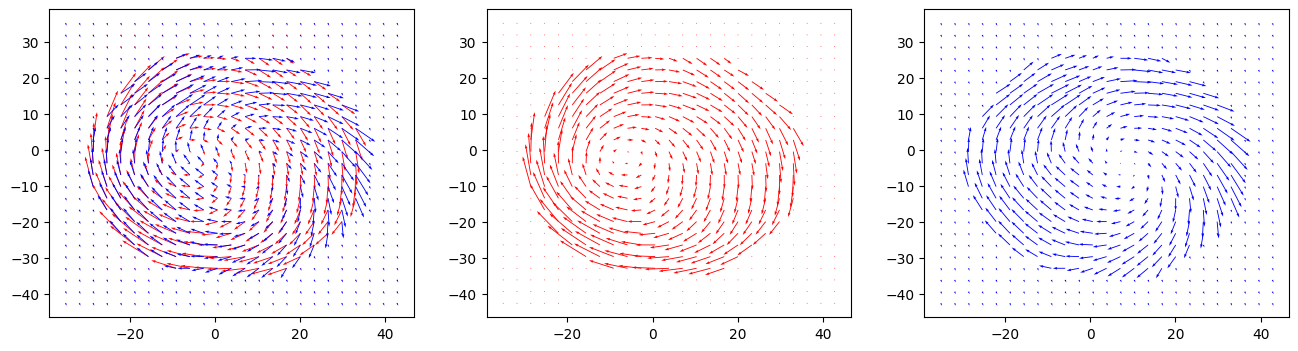

MI(average/percent):
0.848681744007806 0.7645161290322581
SI(average/percent):
0.8706941893321426 0.8225806451612904
76
MI(average/percent):
0.8485014227333093 0.7741935483870968
SI(average/percent):
0.8663012646144848 0.8193548387096774
77
MI(average/percent):
0.8481652771805439 0.7709677419354839
SI(average/percent):
0.8613971854509521 0.8161290322580645
78
MI(average/percent):
0.8476994202285003 0.7741935483870968
SI(average/percent):
0.8568391093646411 0.8032258064516129
79
MI(average/percent):
0.8471941775057426 0.7806451612903226
SI(average/percent):
0.8516462131623386 0.7838709677419354
80


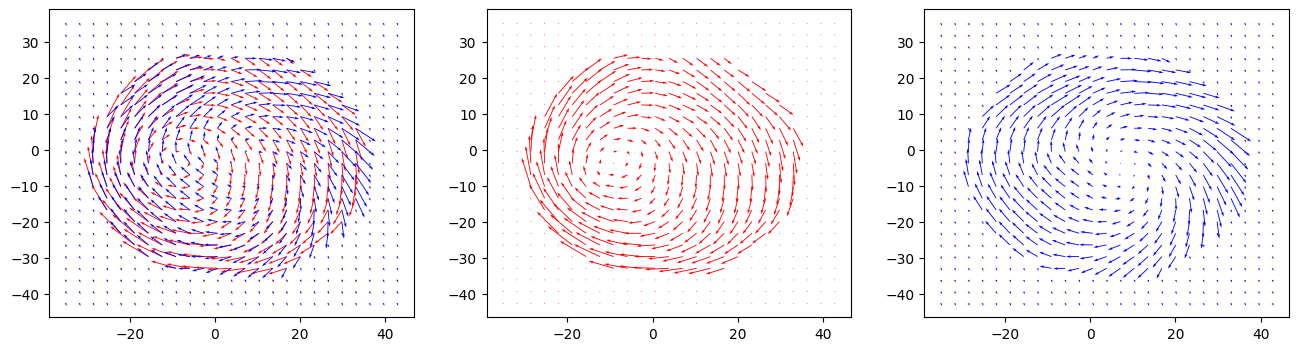

MI(average/percent):
0.8467102913418341 0.7774193548387097
SI(average/percent):
0.8453877725623858 0.7741935483870968
81
MI(average/percent):
0.8458753462119037 0.7774193548387097
SI(average/percent):
0.8422485391962576 0.7645161290322581
82
MI(average/percent):
0.8450049654143419 0.7774193548387097
SI(average/percent):
0.8401029289300346 0.7580645161290323
83
MI(average/percent):
0.8439835287810561 0.7741935483870968
SI(average/percent):
0.8375702828645583 0.7548387096774194
84
MI(average/percent):
0.842774404843217 0.7645161290322581
SI(average/percent):
0.8344223357009997 0.7419354838709677
85


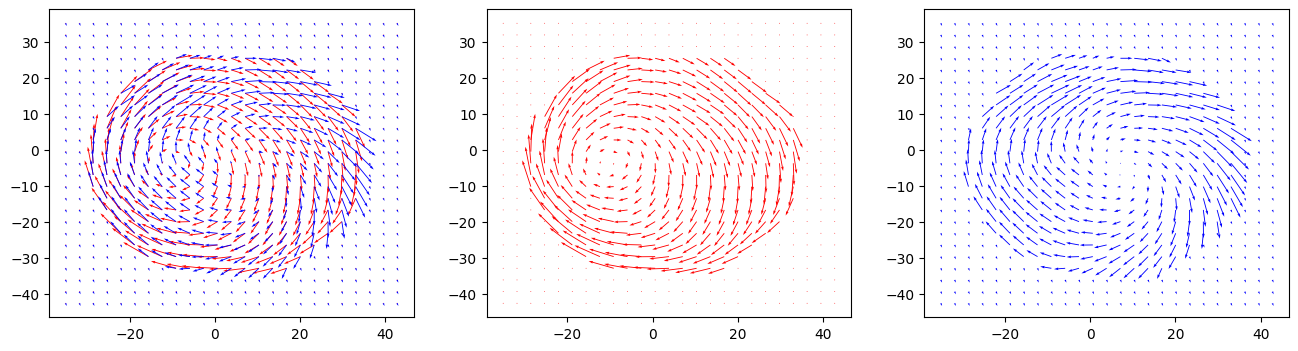

MI(average/percent):
0.8412552055305789 0.7612903225806451
SI(average/percent):
0.8308044083928388 0.7419354838709677
86
MI(average/percent):
0.8407354907480835 0.7516129032258064
SI(average/percent):
0.825579615986875 0.7290322580645161
87
MI(average/percent):
0.8403777604647834 0.7516129032258064
SI(average/percent):
0.8198280262753506 0.7225806451612903
88
MI(average/percent):
0.840116808157095 0.7419354838709677
SI(average/percent):
0.8138152463799367 0.7064516129032258
89
MI(average/percent):
0.8400139130805784 0.7483870967741936
SI(average/percent):
0.8080719708640536 0.6903225806451613
90


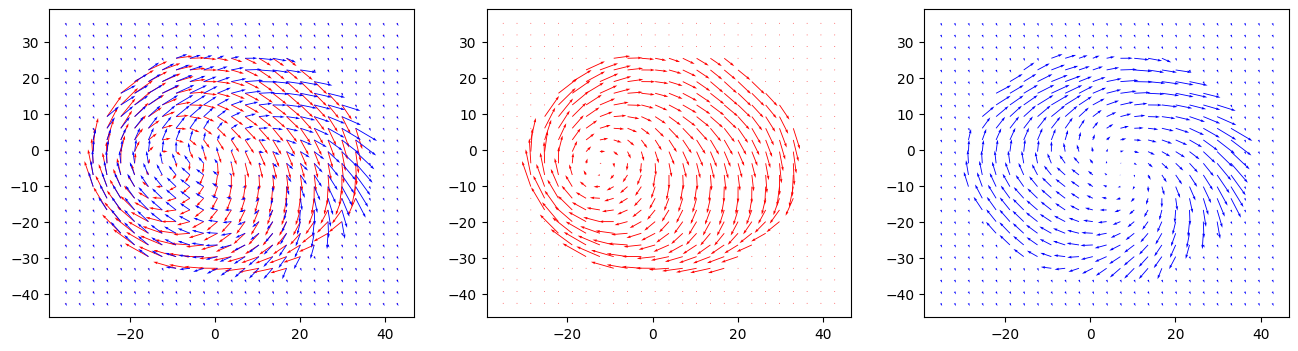

MI(average/percent):
0.8400302321342735 0.7354838709677419
SI(average/percent):
0.8039272345280236 0.6806451612903226
91
MI(average/percent):
0.8395655222037128 0.7419354838709677
SI(average/percent):
0.8003597687651105 0.6709677419354839
92
MI(average/percent):
0.839012228185158 0.7387096774193549
SI(average/percent):
0.7971556942525649 0.667741935483871
93
MI(average/percent):
0.837961425932805 0.7354838709677419
SI(average/percent):
0.7947634373702618 0.6451612903225806
94
MI(average/percent):
0.836468098936844 0.7258064516129032
SI(average/percent):
0.7925524056589007 0.635483870967742
95


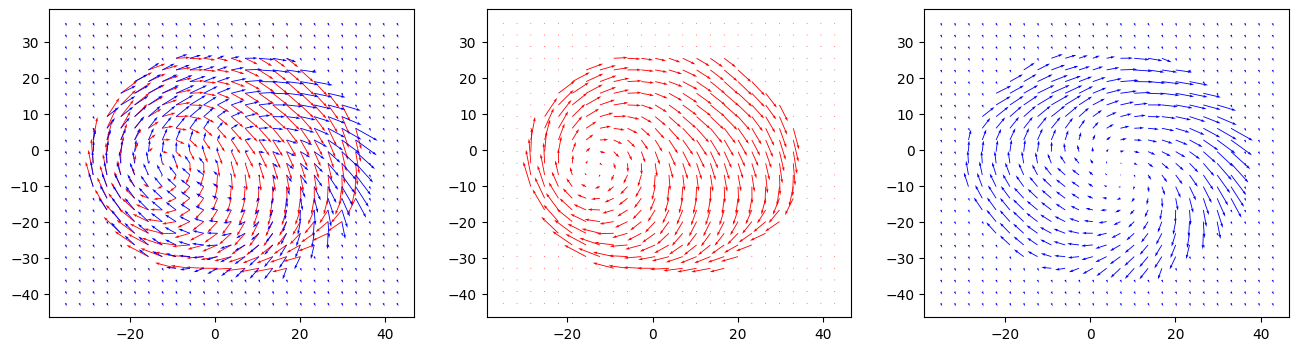

MI(average/percent):
0.8345760257382802 0.7258064516129032
SI(average/percent):
0.7900603370293321 0.6225806451612903
96
MI(average/percent):
0.8334102324682208 0.7193548387096774
SI(average/percent):
0.7880966105030025 0.6258064516129033
97
MI(average/percent):
0.8322991737171281 0.7129032258064516
SI(average/percent):
0.7858165719045606 0.6290322580645161
98
MI(average/percent):
0.8311695464537986 0.7096774193548387
SI(average/percent):
0.7835886701059313 0.6225806451612903
99
MI(average/percent):
0.8300608022457231 0.7129032258064516
SI(average/percent):
0.7808338946405445 0.6129032258064516
100


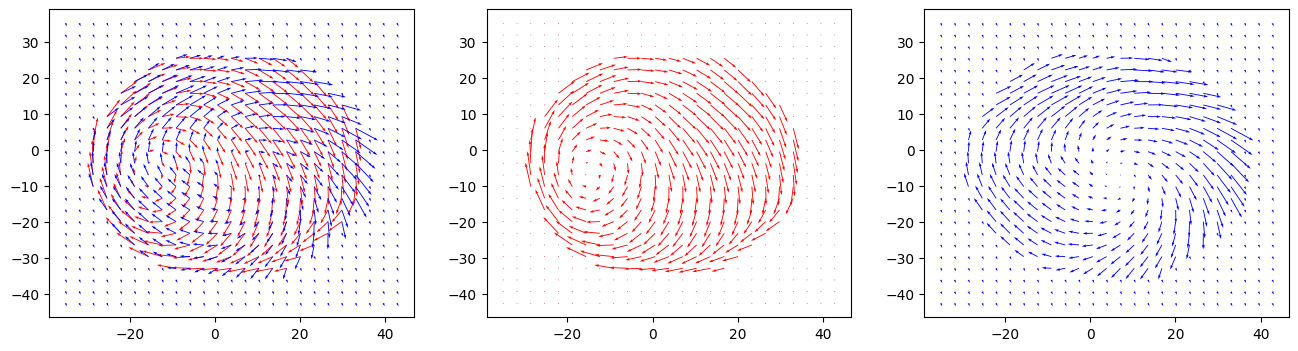

MI(average/percent):
0.8290308242707305 0.7096774193548387
SI(average/percent):
0.7779736500473566 0.603225806451613
101
MI(average/percent):
0.8283470197547811 0.7129032258064516
SI(average/percent):
0.7758441600689207 0.5935483870967742
102
MI(average/percent):
0.8275202272116354 0.7096774193548387
SI(average/percent):
0.7736891968008898 0.5870967741935483
103
MI(average/percent):
0.826593427476064 0.7064516129032258
SI(average/percent):
0.7713690356379991 0.5870967741935483
104
MI(average/percent):
0.8253975884991892 0.7032258064516129
SI(average/percent):
0.7686511542296449 0.5838709677419355
105


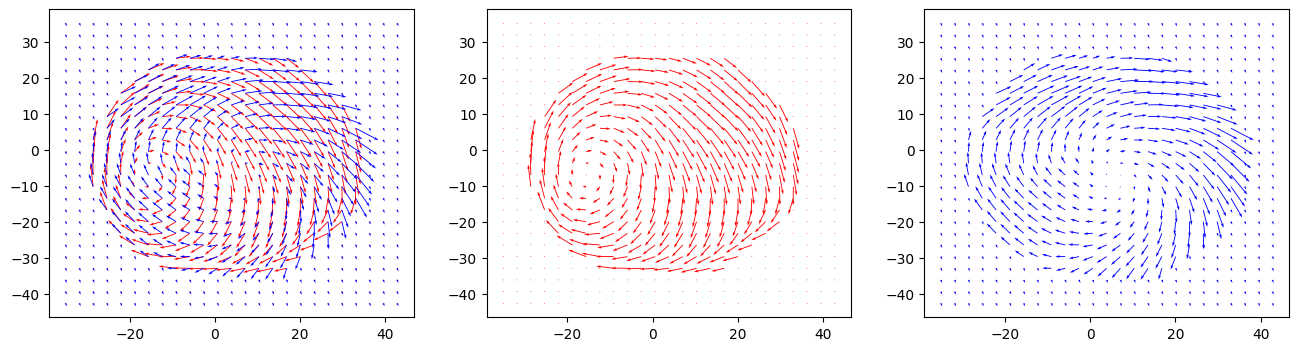

MI(average/percent):
0.8240880492661904 0.7032258064516129
SI(average/percent):
0.7644205829786038 0.5774193548387097
106
MI(average/percent):
0.8242772199897868 0.7032258064516129
SI(average/percent):
0.7661468037751817 0.5774193548387097
107
MI(average/percent):
0.824373379234851 0.7
SI(average/percent):
0.7654590630309752 0.5709677419354838
108
MI(average/percent):
0.8242976460119107 0.6903225806451613
SI(average/percent):
0.7647977836697802 0.5645161290322581
109
MI(average/percent):
0.8239258350499054 0.6935483870967742
SI(average/percent):
0.7639339796301502 0.567741935483871
110


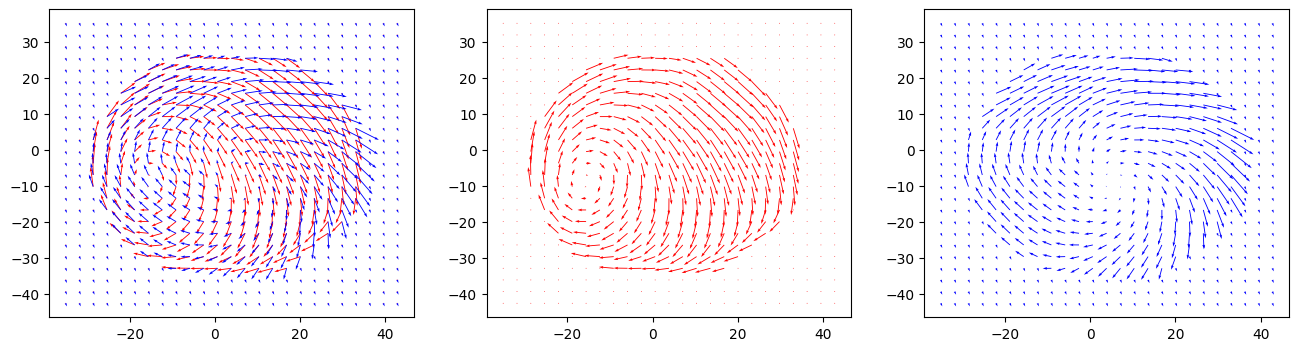

MI(average/percent):
0.823413521377516 0.6903225806451613
SI(average/percent):
0.7627642009005182 0.5612903225806452
111
MI(average/percent):
0.8217686622749865 0.6774193548387096
SI(average/percent):
0.7620372411843618 0.5548387096774193
112
MI(average/percent):
0.8201397037569085 0.6774193548387096
SI(average/percent):
0.7620812550700876 0.567741935483871
113
MI(average/percent):
0.8185362261581438 0.667741935483871
SI(average/percent):
0.7626893011966434 0.5580645161290323
114
MI(average/percent):
0.8169601765299525 0.6548387096774193
SI(average/percent):
0.7630478963813769 0.5548387096774193
115


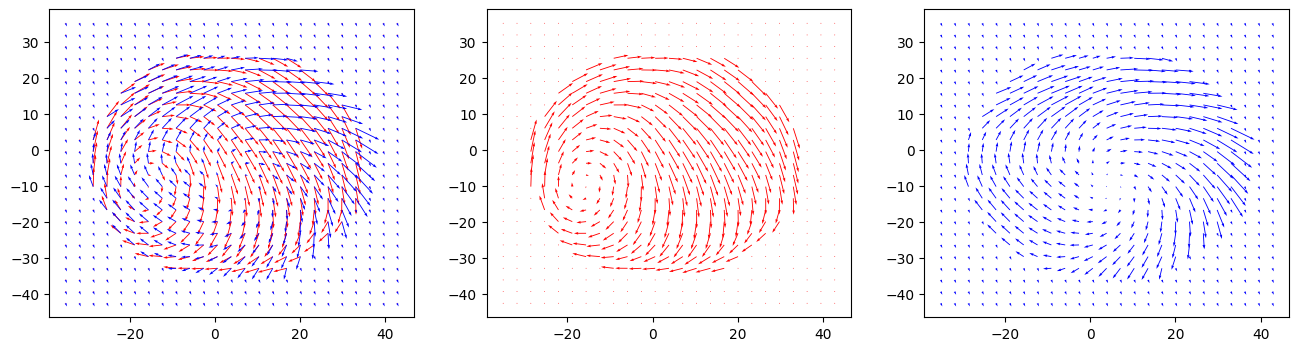

MI(average/percent):
0.8153692897263013 0.6483870967741936
SI(average/percent):
0.7632678452904547 0.5516129032258065
116
MI(average/percent):
0.8149647129664135 0.6612903225806451
SI(average/percent):
0.7636157530363793 0.5612903225806452
117
MI(average/percent):
0.8143188179598543 0.6612903225806451
SI(average/percent):
0.7631619817071934 0.5612903225806452
118
MI(average/percent):
0.8134571322061793 0.6580645161290323
SI(average/percent):
0.7618967465963599 0.5612903225806452
119
MI(average/percent):
0.8121860672947058 0.667741935483871
SI(average/percent):
0.7611467146893043 0.5548387096774193
120


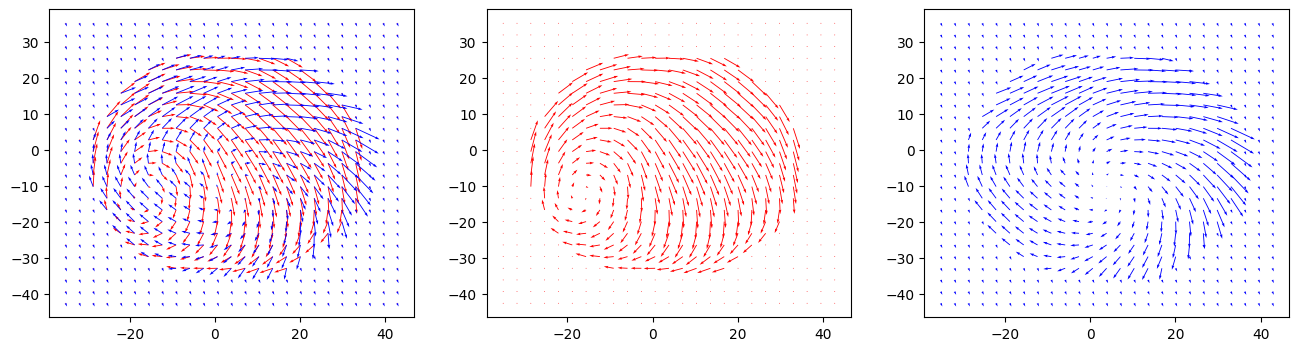

MI(average/percent):
0.8108299580746133 0.6612903225806451
SI(average/percent):
0.7608620784636294 0.5548387096774193
121
MI(average/percent):
0.8094089116088359 0.6516129032258065
SI(average/percent):
0.7613191824094176 0.5580645161290323
122
MI(average/percent):
0.8078732021187145 0.6483870967741936
SI(average/percent):
0.7619725315888882 0.567741935483871
123
MI(average/percent):
0.8062417267231998 0.632258064516129
SI(average/percent):
0.7627086180917337 0.5709677419354838
124
MI(average/percent):
0.8046036173994453 0.6387096774193548
SI(average/percent):
0.7637451952979022 0.5709677419354838
125


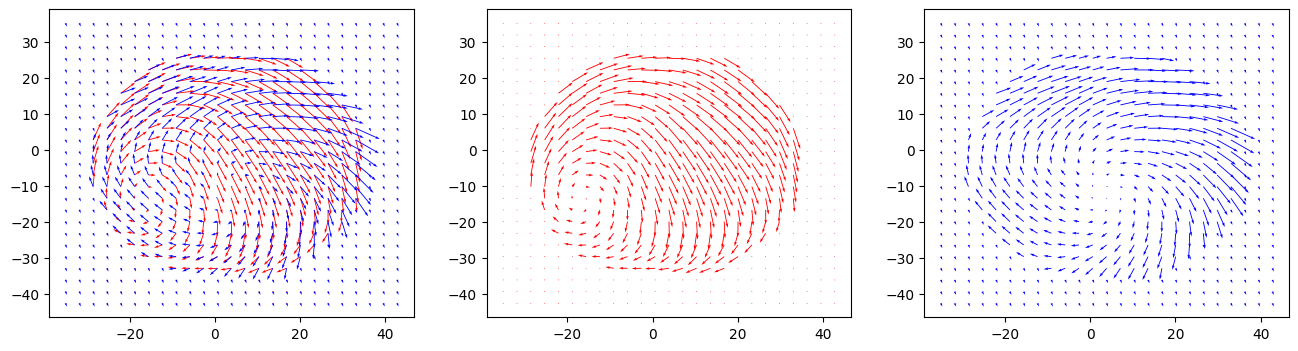

MI(average/percent):
0.8029634638823763 0.6258064516129033
SI(average/percent):
0.7649468398263793 0.567741935483871
126
MI(average/percent):
0.801548590676565 0.6258064516129033
SI(average/percent):
0.7666776659205715 0.5806451612903226
127
MI(average/percent):
0.8000440022301278 0.6129032258064516
SI(average/percent):
0.7682870562380429 0.5806451612903226
128
MI(average/percent):
0.798269871793682 0.5806451612903226
SI(average/percent):
0.7698832167340574 0.5935483870967742
129
MI(average/percent):
0.7963469998708463 0.5774193548387097
SI(average/percent):
0.7708717279347136 0.6064516129032258
130


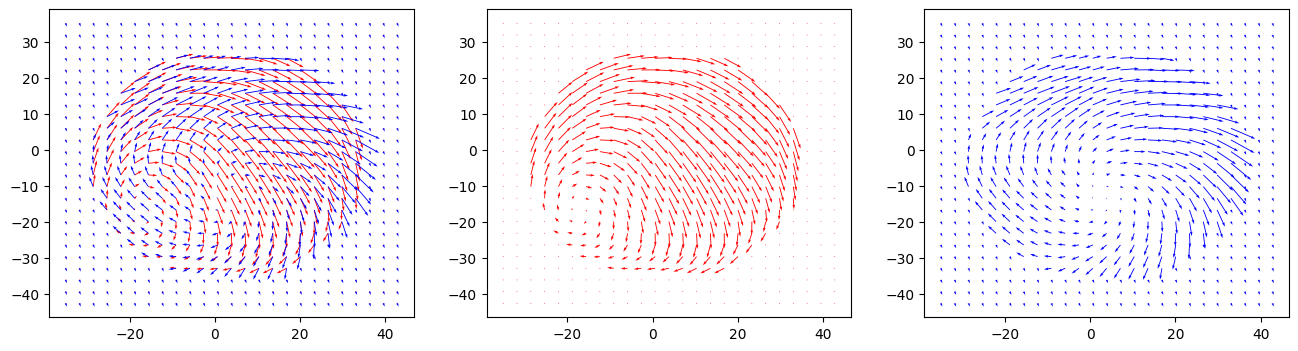

MI(average/percent):
0.7944815451063466 0.5838709677419355
SI(average/percent):
0.7718269408773788 0.6129032258064516
131
MI(average/percent):
0.7927225341841116 0.5870967741935483
SI(average/percent):
0.7729979256299577 0.6193548387096774
132
MI(average/percent):
0.7909542219723305 0.5967741935483871
SI(average/percent):
0.7752126086119167 0.6225806451612903
133
MI(average/percent):
0.789067289520237 0.5967741935483871
SI(average/percent):
0.776815113785974 0.6225806451612903
134
MI(average/percent):
0.7873147237683304 0.5935483870967742
SI(average/percent):
0.7775414278229773 0.6258064516129033
135


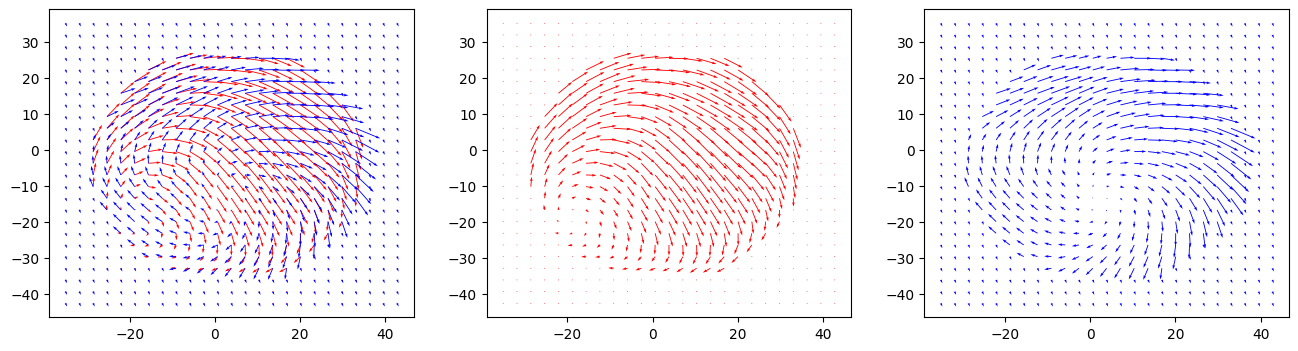

MI(average/percent):
0.7857357809521852 0.5967741935483871
SI(average/percent):
0.778389919657924 0.6225806451612903
136
MI(average/percent):
0.7831901786110735 0.6
SI(average/percent):
0.7803803068534774 0.635483870967742
137
MI(average/percent):
0.7806547436685664 0.6
SI(average/percent):
0.7819538473439056 0.632258064516129
138
MI(average/percent):
0.7782993455226258 0.6
SI(average/percent):
0.7863903976280329 0.6451612903225806
139
MI(average/percent):
0.7761654982987861 0.603225806451613
SI(average/percent):
0.7872210105063893 0.6451612903225806
140


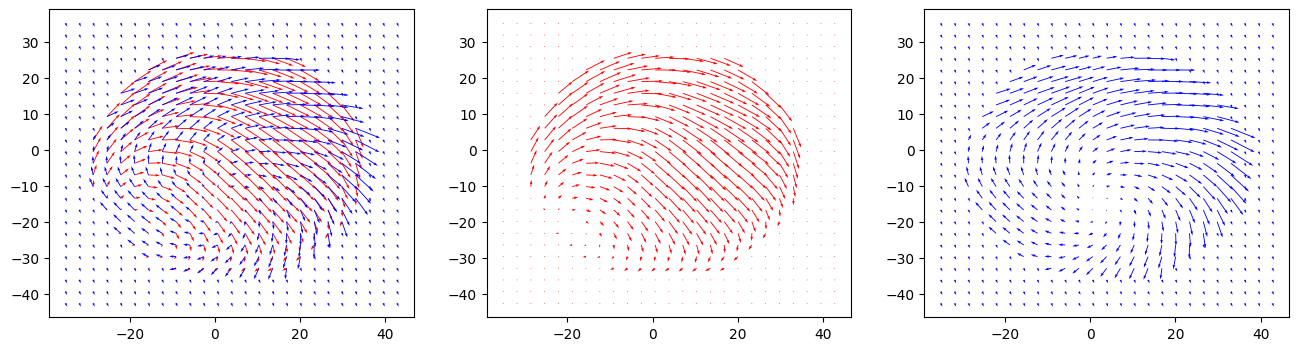

MI(average/percent):
0.7741561629799041 0.6064516129032258
SI(average/percent):
0.7883893612290924 0.6516129032258065
141
MI(average/percent):
0.7725781318268891 0.6096774193548387
SI(average/percent):
0.7886518620490056 0.6516129032258065
142
MI(average/percent):
0.771226468146432 0.6096774193548387
SI(average/percent):
0.7876972156300345 0.6548387096774193
143
MI(average/percent):
0.770179424645387 0.6096774193548387
SI(average/percent):
0.7857851002151667 0.6645161290322581
144
MI(average/percent):
0.7694499999434833 0.6064516129032258
SI(average/percent):
0.7850741087095875 0.6548387096774193
145


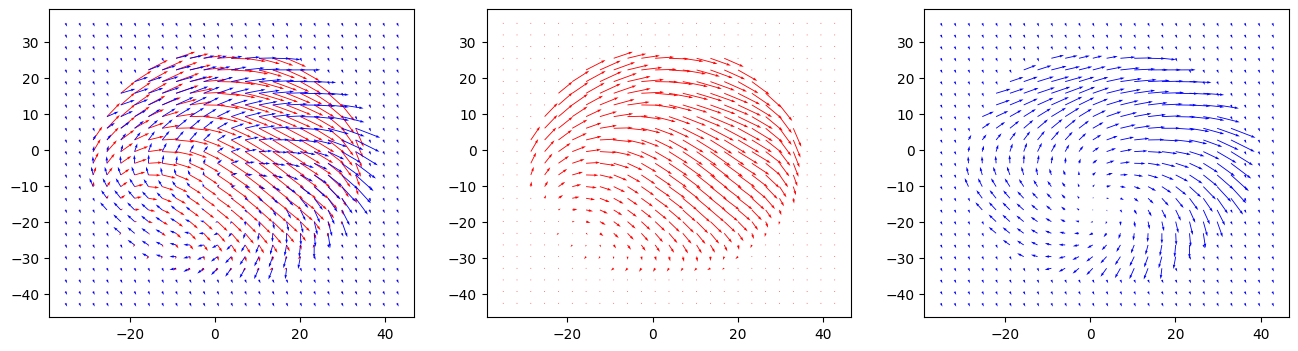

MI(average/percent):
0.7689927243478696 0.6161290322580645
SI(average/percent):
0.7864968488845103 0.6612903225806451


In [13]:
for i in range(p_tot):
    print(i)
    j=i
    if i%(addp)==0:
        plt.figure(figsize=(16, 4))
        plt.subplot(1, 3, 1)
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],v_test[:,:,j,0],v_test[:,:,j,1],color='r')
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],pltpredict[:,:,j,0],pltpredict[:,:,j,1],color='b')
        plt.subplot(1, 3, 2)
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],v_test[:,:,j,0],v_test[:,:,j,1],color='r')
        #plt.quiver(spatial_grid[:,:,1],spatial_grid[:,:,0],pltpredict[:,:,i,0],pltpredict[:,:,i,1],color='b')
        plt.subplot(1, 3, 3)
        #plt.quiver(spatial_grid[:,:,1],spatial_grid[:,:,0],u_dot_train[:,:,i+1,0],u_dot_train[:,:,i+1,1],color='r')
        plt.quiver(spatial_grid[:,:,0],spatial_grid[:,:,1],pltpredict[:,:,j,0],pltpredict[:,:,j,1],color='b')
        plt.show()
    mi_t[i],mi_t_per[i]=miscore(pltpredict[:,:,j,],v_test[:,:,j,:])
    si_t[i],si_t_per[i]=siscore(pltpredict[:,:,j,],v_test[:,:,j,:])

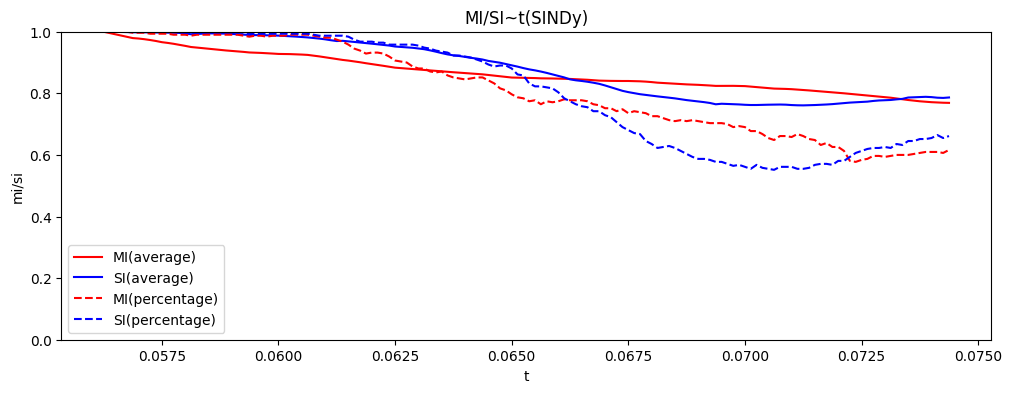

In [14]:
plt.figure(figsize=(12, 4))
plt.title('MI/SI~t(SINDy)')
plt.ylim(0,1)
plt.xlabel('t')
plt.ylabel('mi/si')
plt.plot(t_train,mi_t,'r',label='MI(average)')
plt.plot(t_train,si_t,'b',label='SI(average)')
plt.plot(t_train,mi_t_per,'r--',label='MI(percentage)')
plt.plot(t_train,si_t_per,'b--',label='SI(percentage)')
plt.legend()
plt.plot
plt.show()